12


,index,Date,Population
0,0,1991,5532532.0
1,1,1992,5702534.3
2,2,1993,5872536.6
3,3,1994,6042538.9
4,4,1995,6212541.2
5,5,1996,6382543.5
6,6,1997,6552545.8
7,7,1998,6722548.1
8,8,1999,6892550.4
9,9,2000,7062552.7


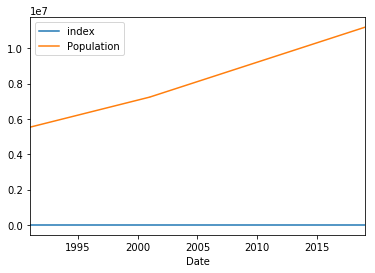

In [98]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import xlsxwriter

def cal_sheet(worksheet, my_map, row):
    col = 0
    for year, num_popu in (my_map.items()):
        worksheet.write(row, col, year)
        worksheet.write(row, col + 1, num_popu)
        row += 1
    return row

def fill_sheet(worksheet):
    my_map = dict()
    start_population = 5532532
    end_population = 7232555
    #start_population = 10
    #end_population = 100
    diff_population = end_population - start_population
   # print(population)
    years = 10
    rate = get_rate(start_population, end_population, years)
    #rate = 25.89254118
    #print(rate)
    my_map = cal_population(years, 1991, start_population, rate)
    row = cal_sheet(worksheet, my_map, 1)
    print(row)
    start_population = 7232555
    end_population = 9429408
    rate = get_rate(start_population, end_population, years)
    #print(rate)
    my_map = cal_population(18, 2001, start_population, rate)
    row = cal_sheet(worksheet, my_map, row)
   
    

def cal_population(years, start_year, initial_population, rate):
    #increment = (rate) * initial_population
    my_map = dict()
    value = initial_population
    years += 2
    for i in range(1, years):
        my_map[start_year] = value
        value += rate
        start_year += 1
    
    return my_map

def get_rate(start, end, years):
    return ((end - start) / years)

workbook = xlsxwriter.Workbook('./data/population_data.xls')
worksheet = workbook.add_worksheet()
worksheet.write('A1', 'Date')
worksheet.write('B1', 'Population')
fill_sheet(worksheet)
workbook.close()



df = pd.read_excel('./data/population_data.xls',  encoding = "utf-8")

groupedDF = pd.DataFrame(df).reset_index()
groupedDF.set_index("Date").plot()
groupedDF